# Diffusion equation in TCLB solver #


In this workshop we will cover basic conceptions related to TCLB solver. We will not dive into detail of TCLB compilation or model development - it is out of scope of this tutorial and is covered in other materials. 


## The d2q9_reaction_diffusion_system_XXXX models

This TCLB model is a collection of Reaction-Diffusion Partial/Ordinary differential equations systems. Basically, the model is build to solve systems in form:

$$
\frac{\partial{\mathbf{DRE}_1(x,t)}}{\partial t}  = \mathrm{Diffusivity\_DRE}_1 \nabla \mathbf{DRE}_1(x,t) + R_1(\mathbb{RHS}) \\
... \\
\frac{\partial{\mathbf{DRE}_i(x,t)}}{\partial t} = \mathrm{Diffusivity\_DRE}_i \nabla \mathbf{DRE}_i(x,t) + R_i(\mathbb{RHS})\\
\frac{d{\mathbf{ODE}_1(x,t)}}{dt} =  F_1(\mathbb{RHS}) \\
... \\
\frac{d{\mathbf{ODE}_i(x,t)}}{dt} =  F_i(\mathbb{RHS}) 
$$

Where $DRE_1(x,t)$ is spatially variable field, solution of first Diffusion-Reaction equation, and $ODE_1(x,t)$ is solution of Ordinary Differential Equation at point $x$. Both equations are solved using second order, implicit midpoint scheme. Spatial discretisation of DRE is performed using LBM method - details could be found in [X]. The right hend side vector is equall 
$$
\mathbb{RHS} = \left[ DRE_i(x,t), ODE_i(x,t) \right]
$$ 


Most of the models have meaningfull names for $\mathbf{DRE_i}$ variables and params, provided below.

At point of writing, supported model are:
### d2q9_reaction_diffusion_system_SimpleDiffusion

$$
\frac{\partial{\mathbf{PHI}(x,t)}}{\partial t} = \mathbf{Diffusivity\_PHI} \nabla \mathbf{PHI}(x,t)
$$

or

$$
\frac{\partial{\phi(x,t)}}{\partial t} = \nu \nabla \phi(x,t)
$$


 
### d2q9_reaction_diffusion_system_AllenCahn

$$
\frac{\partial{\mathbf{PHI}(x,t)}}{\partial t} = \mathbf{Diffusivity\_PHI} \nabla \mathbf{PHI}(x,t) + \mathbf{Lambda}*\mathbf{PHI}(x,t)*(1-\mathbf{PHI}(x,t))
$$ 

 
or

$$
\frac{\partial{\phi(x,t)}}{\partial t} = \nu \nabla \phi(x,t) + C\phi(1-\phi)
$$ 

### d2q9_reaction_diffusion_system_SIR_SimpleLaplace

This simple spatial extension of SIR model, by addition of diffusivity $$\nabla \left( S,I,R \right)$$ to every term

$$
\frac{\partial}{\partial t} \mathbf{S} = - \mathbf{Beta} * \mathbf{S}* \mathbf{I}  + \mathbf{Diffusivity\_S} \nabla \mathbf{S}\\
\frac{\partial}{\partial t} \mathbf{I} = \mathbf{Beta} * \mathbf{S}* \mathbf{I} - \mathbf{Gamma} * \mathbf{I}  + \mathbf{Diffusivity\_I} \nabla \mathbf{I} \\
\frac{\partial}{\partial t} \mathbf{R} = \mathbf{Gamma}*  \mathbf{I} +  \mathbf{Diffusivity\_R} \nabla \mathbf{R}
$$


or 

$$
\frac{\partial}{\partial t} S = - \beta \frac{S}{N}I  + \nu_S \nabla S\\
\frac{\partial}{\partial t} I = \beta \frac{S}{N}I - \gamma I  + \nu_I \nabla I \\
\frac{\partial}{\partial t} R = \gamma I +  \nu_R \nabla R
$$

for $N=1$

### d2q9_reaction_diffusion_system_SIR_ModifiedPeng

or the WSIR model, aleready referenced in this workshop

$$
\frac{\partial}{\partial t} \mathbf{W} = \mathbf{Beta_w} * \left[(\mathbf{I}-\mathbf{W}) \right]  + \mathbf{Diffusivity\_W} \nabla \mathbf{W}\\
\frac{\partial}{\partial t} \mathbf{S} = - \mathbf{Beta} * \frac{\mathbf{S}*\mathbf{W}}{\mathbf{N}}*  \\
\frac{\partial}{\partial t} \mathbf{I} = \mathbf{Beta} * \frac{\mathbf{S}*\mathbf{W}}{\mathbf{N}} - \mathbf{Gamma} * \mathbf{I} \\
\frac{\partial}{\partial t} \mathbf{R} = \mathbf{Gamma}*  \mathbf{I}
$$

or

$$
\frac{\partial}{\partial t} W = \beta_W \left[\frac{r^2}{8}W + (I-W) \right] \\
\frac{\partial}{\partial t} S = - \beta \frac{S}{N}W\\
\frac{\partial}{\partial t} I = \beta \frac{S}{N}W - \gamma I \\
\frac{\partial}{\partial t} R = \gamma I
$$

Keep in mind that for consistency, it's recomended to set
$$
\mathbf{Diffusivity\_W} = \mathbf{Beta_w} * \frac{r^2}{8}
$$


Additionally, list of models could be extracted via:

In [1]:
! git clone https://github.com/CFD-GO/TCLB.git

Cloning into 'TCLB'...
remote: Enumerating objects: 15440, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 15440 (delta 14), reused 12 (delta 6), pack-reused 15414
Receiving objects: 100% (15440/15440), 19.82 MiB | 9.60 MiB/s, done.
Resolving deltas: 100% (10831/10831), done.


In [22]:
! cd  TCLB && git checkout develop

Branch develop set up to track remote branch develop from origin.
Switched to a new branch 'develop'


In [30]:
! wget https://gitlab.com/libeigen/eigen/-/archive/3.4.0/eigen-3.4.0.tar.gz
! tar -zxf eigen-3.4.0.tar.gz

wget: /apps/common/conda/2020.07/lib/libuuid.so.1: no version information available (required by wget)
--2022-05-25 17:37:14--  https://gitlab.com/libeigen/eigen/-/archive/3.4.0/eigen-3.4.0.tar.gz
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘eigen-3.4.0.tar.gz’

    [    <=>                                ] 2,705,005   3.83MB/s   in 0.7s   

2022-05-25 17:37:15 (3.83 MB/s) - ‘eigen-3.4.0.tar.gz’ saved [2705005]



In [35]:
cp -r eigen-3.4.0/Eigen ./TCLB/

In [36]:
! module load common/R gpu/cuda common/libs/hdf5 && cd TCLB && make configure && ./configure --with-hdf5=/apps/common/hdf5/1.12.2/  --with-hdf5-include=/apps/common/hdf5/1.12.2/include  --with-cuda-arch=sm_60 --with-eigen=./

 R 4.0.3@gnu-9.3.1  load complete.
 'common/libs/hdf5/1.12.2' loaded.
 The HDF5 1.12.2 library has been compiled with gcc (GCC) 9.3.1 20200408 (Red Hat 9.3.1-2).

Loading common/libs/hdf5/1.12.2
  Loading requirement: common/mpi/openmpi/4.0.4_gnu-9.3
>make: `configure' is up to date.
/apps/common/mpi/openmpi/4.0.4/gcc-9.3/bin/mpic++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether mpic++ accepts -g... yes
checking how to run the C++ preprocessor... mpic++ -E
checking for grep that handles long lines and -e... /bin/grep
checking for egrep... /bin/grep -E
checking for ANSI C header files... yes
checking for sys/types.h... yes
checking for sys/stat.h... yes
checking for stdlib.h... yes
checking for string.h... yes
checking for memory

In [37]:
! module load common/R gpu/cuda/10.0 common/mpi/openmpi && cd TCLB && make -j 4 d2q9_reaction_diffusion_system_SimpleDiffusion

 R 4.0.3@gnu-9.3.1  load complete.
>make: Circular CLB/d2q9_reaction_diffusion_system_SimpleDiffusion/makefile <- CLB/d2q9_reaction_diffusion_system_SimpleDiffusion/makefile dependency dropped.
  AUTO-DEP   CLB/d2q9_reaction_diffusion_system_SimpleDiffusion/dep.mk
  RT         CLB/d2q9_reaction_diffusion_system_SimpleDiffusion/makefile
make[1]: Entering directory `/lu/tetyda/home/mdzik/rysy/TCLB_Workshop_2021/workshops/40_IntroTCLB/TCLB/CLB/d2q9_reaction_diffusion_system_SimpleDiffusion'
  NVCC       cuda.cu
  G++        Handlers/acRemoteForceInterface.cpp
cuda.cu:22:23: fatal error: Eigen/Dense: No such file or directory
 #include <Eigen/Dense>
                       ^
compilation terminated.
make[1]: *** [cuda.o] Error 1
make[1]: *** Waiting for unfinished jobs....
make[1]: Leaving directory `/lu/tetyda/home/mdzik/rysy/TCLB_Workshop_2021/workshops/40_IntroTCLB/TCLB/CLB/d2q9_reaction_diffusion_system_SimpleDiffusion'
make: *** [CLB/d2q9_reaction_diffusion_system_SimpleDiffusion/main]


## What is included in this environment

To run TCLB model us ipython shell binding:
```python
! tclb ModelName ConfigurationFile.xml 
```

This will effectivelu run (in the curren working directory)
```
$TCLB_PATH/CLB/ModelName/main ConfigurationFile.xml
```
in your Jupyter/Binder.  We will use

```python
! tclb ModelName ConfigurationFile.xml  > /dev/null && echo "DONE!"
```
to supress output in most cases.

## TCLB solver

As you might noticed TCLB is a set of models (like d2q9). TCLB uses XML as source of configuration plus limited numebr of command line options which will be covered latter. There is a python library that helps you build XML on-the-fly if You like.





In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from display_xml import XML


# Basic configuration file #


Let's solve diffusion equation, on 100x100 domain with diffusivity $\nu=1/6$

```xml

<CLBConfig version="2.0" output="output/SimpleDiffusion/"> <!-- The root xml element -->
  <Geometry nx="100" ny="100"> <!-- Mesh size, by default nz=1. MPI divisions are along X -->
    <None name="city"> <!--Named zone or BC, part of the mesh that could be referenced in Model section  -->
      <Box dx="35" nx="30"/> <!-- Markers/geometrical descriptions of the parent zone -->
    </None>
  </Geometry>
  <Model> <!-- Here we set the model parameters, like viscosity -->
    <Param name="Diffusivity_DRE_1" value="0.1666"/> <!-- or Diffusivity for Diffusive-Reactive-Equation #1  -->
    <Param name="Init_DRE_1" value="-0.5"/> <!-- Initial value for Diffusive-Reactive-Equation #1  -->
    <Param name="Init_DRE_1" value="0.5" zone="city"/> <!-- Initial value for Diffusive-Reactive-Equation #1  in Zone City -->
  </Model>
  <HDF5/> <!-- Save at t=0  -->
  <Solve Iterations="200"> <!-- Iterate 100 iterations -->
    <HDF5 Iterations="10"/> <!-- Save HDF5 every 10, HDF5 could be replaced by VTK -->
  </Solve>
</CLBConfig>

```

## and let's run it:

In [3]:
! tclb d2q9_reaction_diffusion_system_SimpleDiffusion SimpleDiffusion.xml 

MPMD: TCLB: local:0/1 work:0/1 ---  connected to:
[  ] -------------------------------------------------------------------------
[  ] -  CLB version:       v6.5.0-71-g352b9281                               -
[  ] -        Model: d2q9_reaction_diffusion_system_SimpleDiffusion                  
[  ]              -
[  ] -------------------------------------------------------------------------
[  ] Setting output path to: SimpleDiffusion
[  ] Discarding 1 comments
[ 0] Running on CPU
[ 0] WARNING: No "Units" element in config file
[  ] Mesh size in config file: 100x100x1
[  ] Global lattice size: 100x100x1
[  ] Max region size: 10000. Mesh size 10000. Overhead:  0%
[  ] Local lattice size: 100x100x1
Hello allocator!
[  ]   Threads  |      Action
[  ]     1x1    | Primal , NoGlobals , InitFromExternal
[  ]     1x1    | Tangent , NoGlobals , InitFromExternal
[  ]     1x1    | Optimize , NoGlobals , InitFromExternal
[  ]     1x1    | SteadyAdjoint , NoGlobals , InitFromExternal
[  ]     1x1  

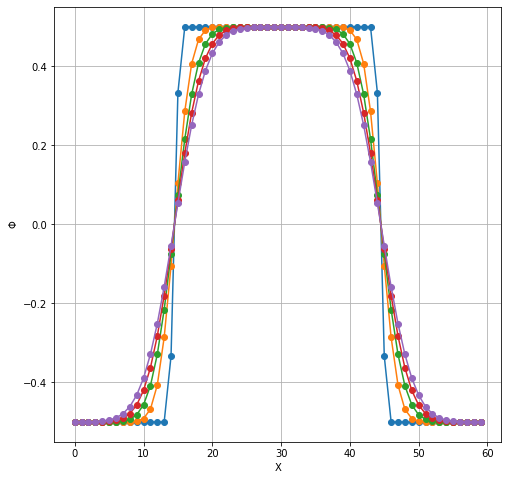

In [4]:
TimeSteps = list()

for i in range(0,200,10):
    f = h5py.File('./output/SimpleDiffusion/SimpleDiffusion_HDF5_%08d.h5'%i)    
    TimeSteps.append(f['PHI'][0,:,:])
    
TimeSteps = np.array(TimeSteps)

plt.figure(figsize=(8,8))
plt.plot(TimeSteps[:5,25,20:80].T, 'o-');
plt.grid(which='both');
plt.xlabel('X');
plt.ylabel(r'$\Phi$');


We could also extract 1D image

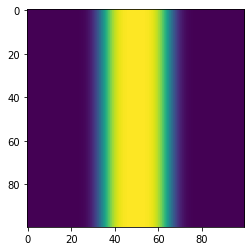

In [5]:
plt.imshow(TimeSteps[5])

# Using TCLBConfig writer class 

Now, we are gona generate same XML file using XML library. A nice think is that we could use it to do some parametric studies. It also does limited "syntax" check.

In [6]:
import CLB.CLBXMLWriter as CLBXML   

In [7]:
CLBc = CLBXML.CLBConfigWriter( )

CLBc.addGeomParam('nx', 100)
CLBc.addGeomParam('ny', 100)

CLBc.addNone(name="city")
CLBc.addBox(dx=35, nx=35)

params = {
        "Diffusivity_PHI":0.1666,
        "Init_PHI":-0.5
}

CLBc.addModelParams(params)

params = {
        "Init_PHI":0.5
}

CLBc.addHDF5()
CLBc.addModelParams(params, zone='city')
solve = CLBc.addSolve(iterations=200)
CLBc.addHDF5(Iterations=10, parent=solve)
   
CLBc.write('SimpleDiffusionByCLBXMLWriter.xml')


Apart from float representation, the resulting file is identical

In [8]:
f = open('SimpleDiffusionByCLBXMLWriter.xml', 'r')
XML(''.join(f.readlines()))

In [9]:
! tclb d2q9_reaction_diffusion_system_SimpleDiffusion SimpleDiffusionByCLBXMLWriter.xml > /dev/null && echo "DONE!"

Hello allocator!
DONE!


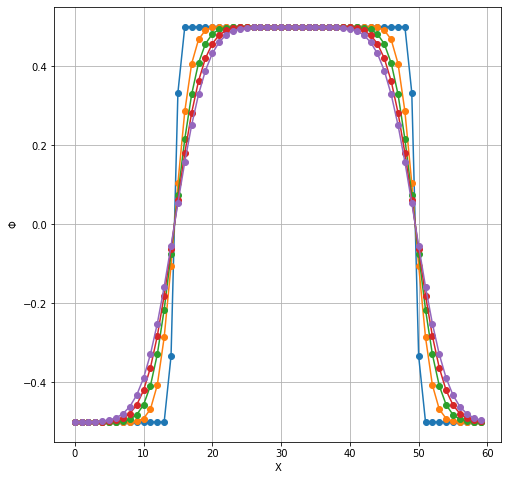

In [10]:
TimeSteps2 = list()

for i in range(0,200,10):
    f = h5py.File('./output/SimpleDiffusionByCLBXMLWriter_HDF5_%08d.h5'%i)    
    TimeSteps2.append(f['PHI'][0,:,:])
    
TimeSteps2 = np.array(TimeSteps2)

plt.figure(figsize=(8,8))
plt.plot(TimeSteps2[:5,25,20:80].T, 'o-');
plt.grid(which='both');
plt.xlabel('X');
plt.ylabel(r'$\Phi$');

# RInside: periodic IC and comparison with Finite Difference

Let's create initial condition, we will start in python

R inside block is build as

```python
CLBc.addRunR(eval=\
"""
some <- r_code
""")
```

which will result in XML as:
```xml
<RunR>
<![CDATA[
   some <- r_code
]]>
</RunR>
```
Notice, that `<` in some cases got converted into `&lt;`. This is XML character escaping. Keep the CDATA element and all be OK :)

Outmost usable part of R-TCLB integration are accessors to internal Fields:

``r
Solver.Fields.FIELDNAME[] = SAMESHAPEVARIABLE;
``

and Actions/Stages:

```r
Solver.Actions.InitFromExternalAction();
```


You could also call standard R functions inside (Full R should be avalible - it's embeded interpreter, see RInside upstream documentation for details/limitations if you need):
```r
init = read.table("initial.csv", header = FALSE, sep = "", dec = ".");
```
    


### Let's create initial "data file"

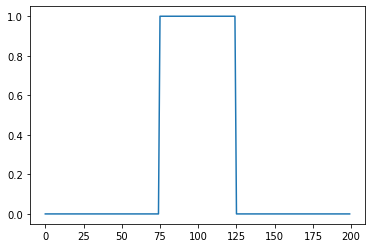

In [11]:
u_ic = np.zeros(200)
u_ic[75:-75] = 1
plt.plot(u_ic)
np.savetxt("initial.csv", u_ic, delimiter=",")

### Now the XML configuration

In [12]:

CLBc = CLBXML.CLBConfigWriter( )

CLBc.addGeomParam('nx', 200)
CLBc.addGeomParam('ny', 100)


CLBc.addRunR(eval=\
"""
    init = read.table("initial.csv", header = FALSE, sep = "", dec = ".");
    Solver$Fields$Init_PHI_External[] = init[,1];
    Solver$Actions$InitFromExternalAction();
""")

    
params = {
        "Diffusivity_PHI":0.1666,
        "Init_PHI":-0.5
}

CLBc.addModelParams(params)


CLBc.addHDF5()
solve = CLBc.addSolve(iterations=200)
CLBc.addHDF5(Iterations=10, parent=solve)
   
CLBc.write('SimpleDiffusionWithRinside.xml')

f = open('SimpleDiffusionWithRinside.xml', 'r')
XML(''.join(f.readlines()))

In [13]:
! tclb d2q9_reaction_diffusion_system_SimpleDiffusion SimpleDiffusionWithRinside.xml > /dev/null && echo 'DONE!'

Hello allocator!
DONE!


### Solution obtained from TCLB

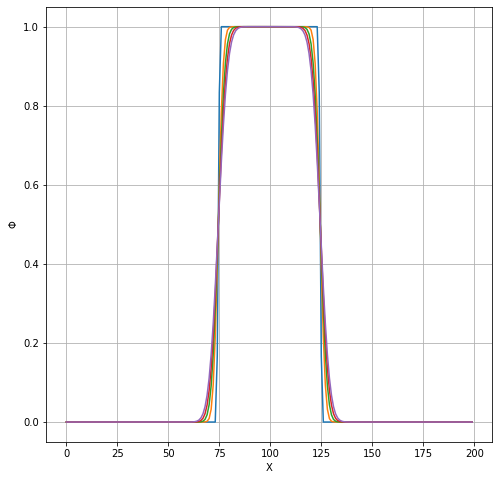

In [14]:
TimeSteps2 = list()

for i in range(0,200,10):
    f = h5py.File('./output/SimpleDiffusionWithRinside_HDF5_%08d.h5'%i)    
    TimeSteps2.append(f['PHI'][0,:,:])
    
TimeSteps2 = np.array(TimeSteps2)

plt.figure(figsize=(8,8))
plt.plot(TimeSteps2[:5,25,:].T, '-');
plt.grid(which='both');
plt.xlabel('X');
plt.ylabel(r'$\Phi$');

### Comparison with Backward Time - Central Space FD


In [15]:
def btcs(u_IC, nu, nx, nt, dt, dx):
    
    un_icfd = u_IC.copy()
    A = np.zeros((nx, nx))
    
    
    
    Beta_FD = dt * nu / (dx**2) 
    # nt += 100
    last_index_in_matrix = nx -1 
    # the BC  - use one sided FD            
    A[0, 0] = 1-Beta_FD     # forward FD
    A[0, 1] = 2*Beta_FD     # forward FD 
    A[0, 2] = -Beta_FD      # forward FD 
    A[last_index_in_matrix, last_index_in_matrix-2] = -Beta_FD   # backward FD 
    A[last_index_in_matrix, last_index_in_matrix-1] = 2*Beta_FD  # backward FD 
    A[last_index_in_matrix, last_index_in_matrix] =  1-Beta_FD   # backward FD 
    for i in range(1, last_index_in_matrix): 
        A[i, i-1] = -Beta_FD        # left of the diagonal
        A[i, i] = 1 + 2*Beta_FD     # the diagonal
        A[i, i+1] = -Beta_FD         # right of the diagonal   

    A_inv = np.linalg.inv(A)
    solution = list()
    solution.append(u_ic)
    for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
        un_icfd = A_inv@un_icfd
        solution.append(un_icfd)
    
    return np.array(solution)
        
    
solution = btcs(u_ic, 0.1666, u_ic.shape[0], 200, 1, 1)

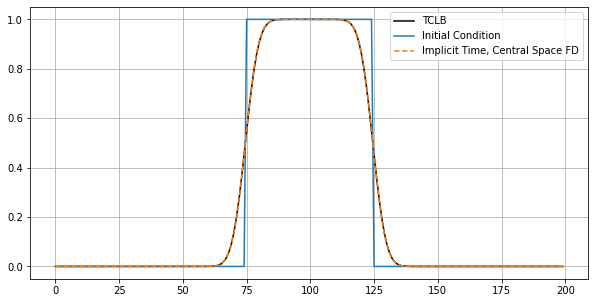

In [16]:

plt.figure(figsize=(10,5))
plt.plot(TimeSteps2[5,25,:].T, 'k-', label='TCLB');
plt.plot(solution[0,:], label='Initial Condition')
plt.plot(solution[50,:], '--', label='Implicit Time, Central Space FD')
plt.legend()
plt.grid(which='both')

# RInside: read an image as initial condition

Firstly - we need to install locally aditional R package - **jpeg**, to enable us interaction with JPEG files. We could install it locally, bu keep it mind, that if you are using it at BinderHub, this is temparary

In [17]:
! mkdir -p r_packages
! echo 'install.packages("jpeg", repos="http://cran.r-project.org", lib="r_packages")' | /usr/bin/R --slave

trying URL 'http://cran.r-project.org/src/contrib/jpeg_0.1-9.tar.gz'
Content type 'application/x-gzip' length 18596 bytes (18 KB)
downloaded 18 KB

* installing *source* package 'jpeg' ...
** package 'jpeg' successfully unpacked and MD5 sums checked
** using staged installation
** libs
gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG     -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-jbaK_j/r-base-3.6.3=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c read.c -o read.o
gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG     -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-jbaK_j/r-base-3.6.3=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c reg.c -o reg.o
gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG     -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-jbaK_j/r-base-3.6.3=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c write.c -o write.o
gcc -

## Let's check if it work - we use an image of a M-18A Dromader airplane as initial condition ;)

Hello allocator!
DONE


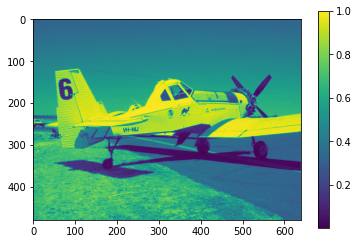

In [18]:
CLBc = CLBXML.CLBConfigWriter( )

CLBc.addGeomParam('nx', 640)
CLBc.addGeomParam('ny', 480)


CLBc.addRunR(eval=\
"""
    library('jpeg', lib="r_packages")
    
    myurl <- "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/M-18A_Dromader_CALM.jpg/640px-M-18A_Dromader_CALM.jpg"
    z <- tempfile()
    download.file(myurl,z,mode="wb", quiet=TRUE);
    pic <- readJPEG(z);
    file.remove(z) # cleanup

    Solver$Fields$Init_PHI_External[] = t(pic[,,1]);
    Solver$Actions$InitFromExternalAction();
""")

    
params = {
        "Diffusivity_PHI":0.1666,
        "Init_PHI":-0.5
}

CLBc.addModelParams(params)

CLBc.addHDF5()  
CLBc.write('SimpleDiffusionOfDromader.xml')


! tclb d2q9_reaction_diffusion_system_SimpleDiffusion SimpleDiffusionOfDromader.xml > /dev/null && echo "DONE"

i = 0
f = h5py.File('./output/SimpleDiffusionOfDromader_HDF5_%08d.h5'%i)    
plt.imshow(f['PHI'][0,:,:])
plt.colorbar()


### The CLBc object could be reused (something could be appended to it after save, parameters could bo overwritten)
XML for diffusion of the example image will look like that:


In [19]:

solve = CLBc.addSolve(iterations=200)
CLBc.addHDF5(Iterations=10, parent=solve)
CLBc.write('SimpleDiffusionOfDromader_withIterations.xml')
f = open('SimpleDiffusionOfDromader_withIterations.xml', 'r')
XML(''.join(f.readlines()))

In [20]:
! tclb d2q9_reaction_diffusion_system_SimpleDiffusion SimpleDiffusionOfDromader_withIterations.xml > /dev/null && echo "DONE"

Hello allocator!
DONE


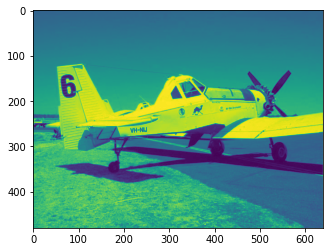

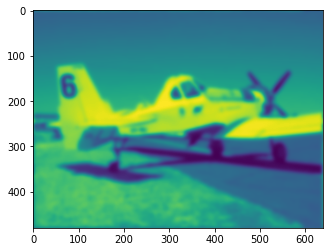

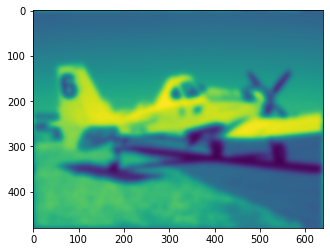

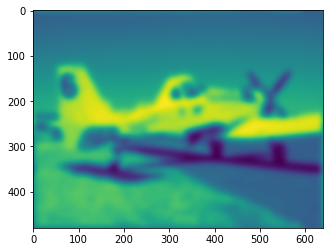

In [21]:
for i in range(0,200,50):
    plt.figure()
    f = h5py.File('./output/SimpleDiffusionOfDromader_withIterations_HDF5_%08d.h5'%i)    
    plt.imshow(f['PHI'][0,:,:])